# PyAnsys Geometry 101: Plotter
This example provides an overview of PyAnsys Geometry's plotting capabilities, focusing on
its plotter features. After reviewing the fundamental concepts of sketching
and modeling in PyAnsys Geometry, it shows how to leverage these key plotting capabilities:

- **Multi-object plotting**: You can conveniently plot a list of elements, including objects
  created in both PyAnsys Geometry and PyVista libraries.
- **Interactive object selection**: You can interactively select PyAnsys Geometry objects within the
  scene. This enables efficient manipulation of these objects in subsequent scripting.

## Perform required imports

Perform the required imports.

In [1]:
from pint import Quantity
import pyvista as pv

from ansys.geometry.core import Modeler
from ansys.geometry.core.connection.defaults import GEOMETRY_SERVICE_DOCKER_IMAGE
from ansys.geometry.core.connection.docker_instance import LocalDockerInstance
from ansys.geometry.core.math import Point2D
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.plotting import PlotterHelper
from ansys.geometry.core.sketch import Sketch

## Load modeling service

Load the modeling service. While the following code uses a Docker image to interact
with the modeling service, you can use any suitable method mentioned in the
preceding examples.

In [2]:
list_images = []
list_containers = []
available_images = LocalDockerInstance.docker_client().images.list(
    name=GEOMETRY_SERVICE_DOCKER_IMAGE
)
is_image_available_cont = None
for image in available_images:
    for geom_image, geom_cont in zip(list_images, list_containers):
        if geom_image in image.tags:
            is_image_available = True
            is_image_available_cont = geom_cont
            break

docker_instance = LocalDockerInstance(
    connect_to_existing_service=True,
    restart_if_existing_service=True,
    image=is_image_available_cont,
)

modeler = Modeler(docker_instance=docker_instance)

## Instantiate design and initialize object list

Instantiate a new design to work on and initialize a list
of objects for plotting.

In [3]:
# init modeler
design = modeler.create_design("Multiplot")

plot_list = []

You are now ready to create some objects and use the
plotter capabilities.

## Create a PyAnsys Geometry body cylinder

Use PyAnsys Geometry to create a body cylinder.

In [4]:
cylinder = Sketch()
cylinder.circle(Point2D([10, 10], UNITS.m), 1.0)
cylinder_body = design.extrude_sketch("JustACyl", cylinder, Quantity(10, UNITS.m))
plot_list.append(cylinder_body)

## Create a PyAnsys Geometry arc sketch

Use PyAnsys Geometry to create an arc sketch.

In [5]:
sketch = Sketch()
sketch.arc(
    Point2D([20, 20], UNITS.m),
    Point2D([20, -20], UNITS.m),
    Point2D([10, 0], UNITS.m),
    tag="Arc",
)
plot_list.append(sketch)

## Create a PyVista cylinder
Use PyVista to create a cylinder.

In [6]:
cyl = pv.Cylinder(radius=5, height=20, center=(-20, 10, 10))
plot_list.append(cyl)

## Create a PyVista multiblock
Use PyVista to create a multiblock with a sphere and a cube.

In [7]:
blocks = pv.MultiBlock(
    [pv.Sphere(center=(20, 10, -10), radius=10), pv.Cube(x_length=10, y_length=10, z_length=10)]
)
plot_list.append(blocks)

## Create a PyAnsys Geometry body box

Use PyAnsys Geometry to create a body box that is a cube.

In [8]:
box2 = Sketch()
box2.box(Point2D([-10, 20], UNITS.m), Quantity(10, UNITS.m), Quantity(10, UNITS.m))
box_body2 = design.extrude_sketch("JustABox", box2, Quantity(10, UNITS.m))
plot_list.append(box_body2)

## Plot objects

When plotting the created objects, you have several options.

You can simply plot one of the created objects.

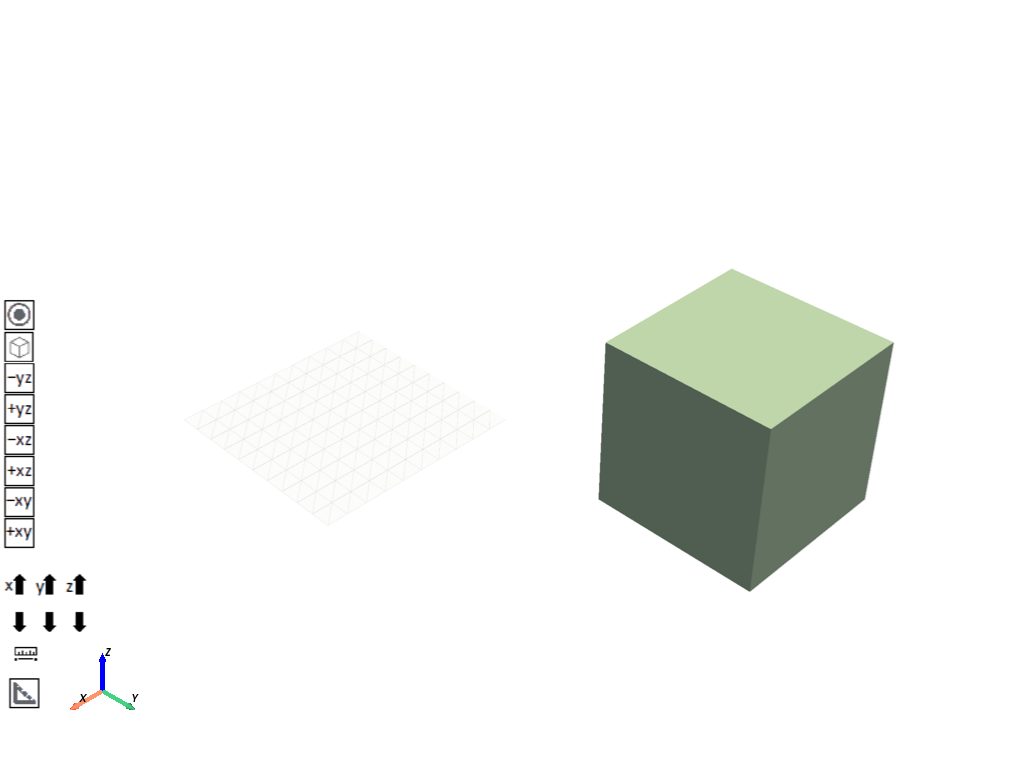

[]

In [9]:
plotter = PlotterHelper()
plotter.plot(box_body2)

You can plot the whole list of objects.

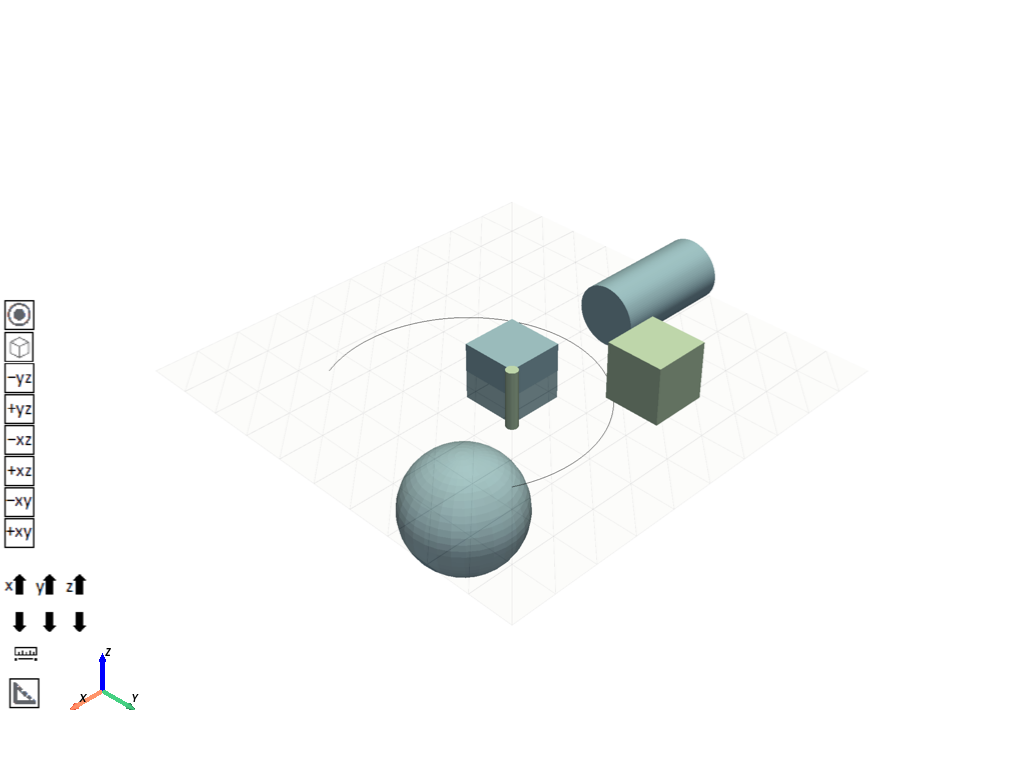

[]

In [10]:
plotter = PlotterHelper()
plotter.plot(plot_list)

The Python visualizer is used by default. However, you can also use
[trame](https://kitware.github.io/trame/index.html) for visualization.

```python

plotter = PlotterHelper(use_trame=True)
plotter.plot(plot_list)
```

## Clip objects

You can clip any object represented in the plotter by defining a ``Plane`` object that
intersects the target object.

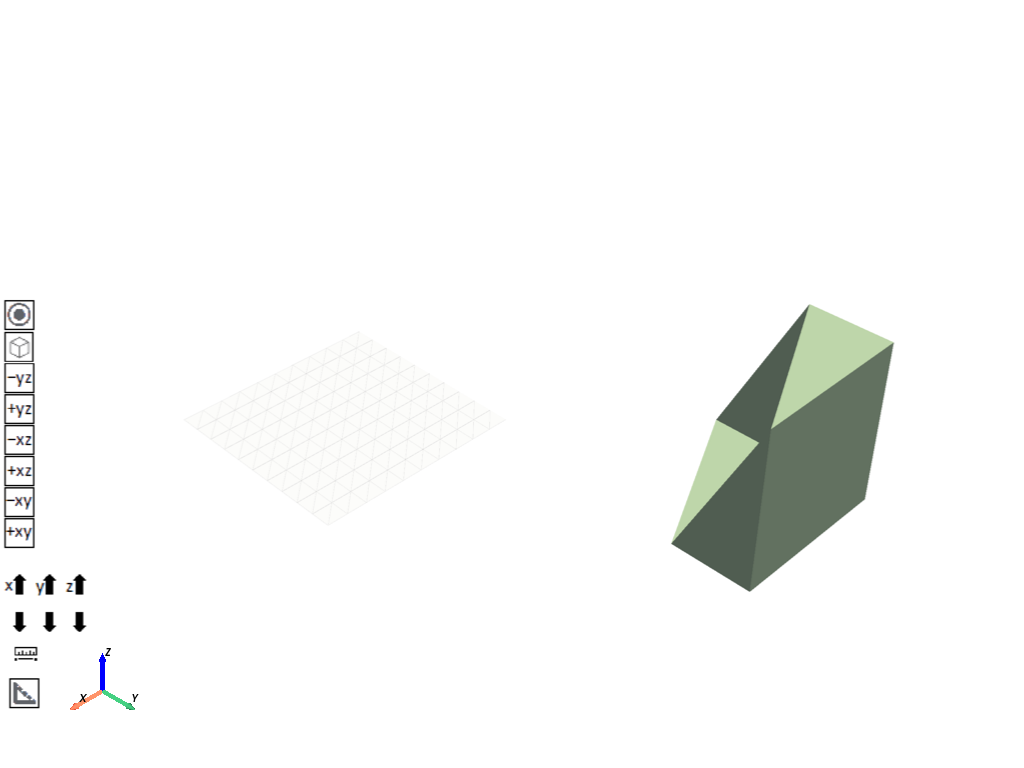

[]

In [11]:
from ansys.geometry.core.math import Plane, Point3D
ph = PlotterHelper()

# Define PyAnsys Geometry box
box2 = Sketch()
box2.box(Point2D([-10, 20], UNITS.m), Quantity(10, UNITS.m), Quantity(10, UNITS.m))
box_body2 = design.extrude_sketch("JustABox", box2, Quantity(10, UNITS.m))

# Define plane to clip the box
origin = Point3D([-10., 20., 5.], UNITS.m)
plane = Plane(origin=origin, direction_x=[1, 1, 1], direction_y=[-1, 0, 1])

# Add the object with the clipping plane
ph.add(box_body2, clipping_plane=plane)
ph.plot()

## Select objects interactively

PyAnsys Geometry's plotter supports interactive object selection within the scene.
This enables you to pick objects for subsequent script manipulation.

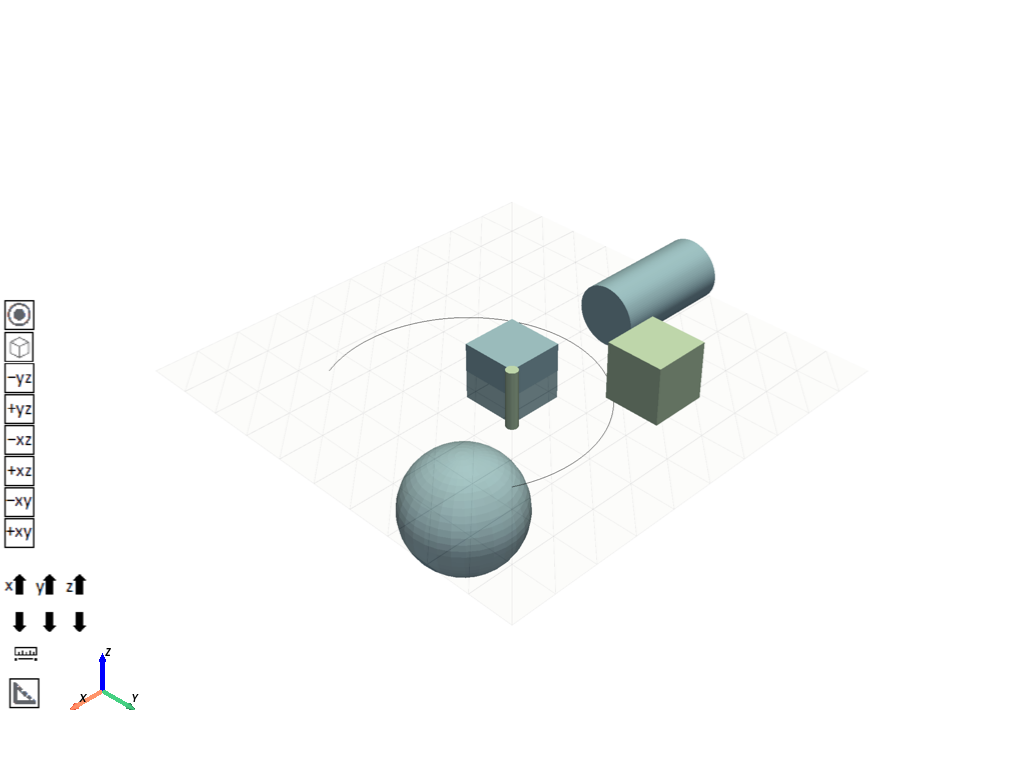

[]


In [12]:
plotter = PlotterHelper(allow_picking=True)

# Plotter returns picked bodies
picked_list = plotter.plot(plot_list)
print(picked_list)

## Close session
When you finish interacting with your modeling service, you should close the active
server session. This frees resources wherever the service is running.

Close the server session.

In [13]:
modeler.close()